# TUGAS PCA : PCA with Raisin dataset

Mengimport library yang diperlukan

In [52]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Import data 

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/Iqbalsuryaa/pendata/main/kismis.csv')
jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


Mengecek nilai yang hilang/kosong pada data

In [54]:
df_copy = df.copy()
df_copy.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Mengganti nilai yang mengandung tanda tanya (?) menjadi nilai kosong

In [55]:
df_copy = df_copy.replace('?',np.nan)

Mengecek lagi berapa nilai yang kosong pada data

In [56]:
df_copy.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik/float maka perlu diganti type datanya

In [57]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Memisahkan fitur dan target

In [58]:
# features and target
X = df_copy[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']]
y = df_copy['Class']

Melakukan Normalisasi Data pada Fitur dan Target

In [59]:
# Normalisasi pada X
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Normalisasi pada y
label = LabelEncoder()
y = label.fit_transform(y)

Menyimpan data normalisasi

In [60]:
# Menyimpan normalisasi ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Menyimpan normalisasi ke file
with open('label.pkl', 'wb') as file:
    pickle.dump(label, file)

Melihat Data yang sudah di Normalisasi

In [61]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat = pd.DataFrame(X, columns=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])
liat['Class'] = y

# Menampilkan DataFrame yang digabungkan
liat.head(jumlah_baris)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791,1
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842,1
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594,1
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284,1
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493,1
...,...,...,...,...,...,...,...,...
895,0.275975,0.264945,0.298733,0.763836,0.236831,0.634192,0.245347,0
896,0.295540,0.278757,0.331595,0.749761,0.256905,0.563259,0.286325,0
897,0.354240,0.267056,0.445044,0.608017,0.317858,0.792897,0.324126,0
898,0.324983,0.324902,0.316915,0.810259,0.283698,0.612254,0.307635,0


Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [62]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## 1. Membangun model KNN

In [63]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_prediksi_knn = knn.predict(X_test)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_prediksi_knn)))

Accuracy: 0.83


In [64]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat_knn = pd.DataFrame(y_test, columns=['y_test'])
liat_knn['y_prediksi_knn'] = y_prediksi_knn

# Menampilkan DataFrame yang digabungkan
liat_knn.head(jumlah_baris)

,y_test,y_prediksi_knn
0,1,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
175,0,0
176,0,0
177,0,0
178,1,1


Menyimpan model KNN

In [65]:
# Menyimpan model ke file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

Mencoba mengkategorikan target dari fitur yang diberikan

In [66]:
# Load model dari file
with open('knn_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)

# Load normalisasi dari file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('label.pkl', 'rb') as file:
    label = pickle.load(file)

# Buat data baru
data_baru = np.array([[87524, 442.2460114, 253.291155, 0.819738392, 90546, 0.758650579, 1184.04]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
data_baru_scaled = scaler.fit_transform(data_baru)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = knn_loaded.predict(data_baru_scaled)
y_pred_scaled = label.inverse_transform(y_pred)

print(y_pred_scaled)

['Kecimen']


## 2. Membangun model KNN dengan PCA

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [68]:
pca.get_covariance()

array([[ 0.0346055 ,  0.02609224,  0.02418815,  0.00920631,  0.02996367,
        -0.00029471,  0.02355289],
       [ 0.02609224,  0.02261123,  0.01570009,  0.01292171,  0.02298298,
        -0.00359765,  0.01936782],
       [ 0.02418815,  0.01570009,  0.02056748, -0.00058459,  0.02077436,
         0.00244587,  0.01562804],
       [ 0.00920631,  0.01292171, -0.00058459,  0.02168065,  0.00829232,
        -0.00623923,  0.00868467],
       [ 0.02996367,  0.02298298,  0.02077436,  0.00829232,  0.02615751,
        -0.00104019,  0.02080222],
       [-0.00029471, -0.00359765,  0.00244587, -0.00623923, -0.00104019,
         0.01377294, -0.00268086],
       [ 0.02355289,  0.01936782,  0.01562804,  0.00868467,  0.02080222,
        -0.00268086,  0.01734518]])

In [69]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([7.49746589e-01, 1.73717507e-01, 6.44728317e-02, 7.59429807e-03,
       3.39383065e-03, 9.04682534e-04, 1.70260467e-04])

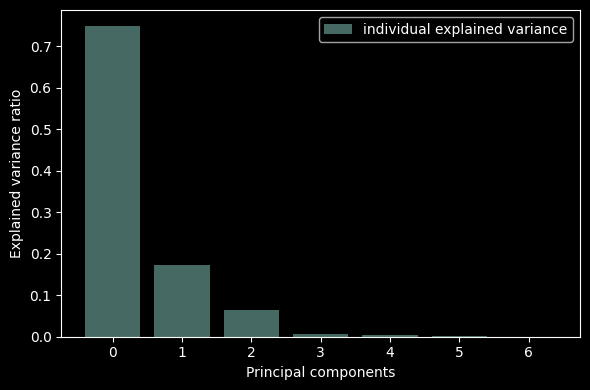

In [70]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [71]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [72]:
print(pca)

PCA(n_components=3)


In [73]:
print(X_new)

[[ 0.01351766  0.00949252 -0.14233446]
 [-0.0815948  -0.05844251  0.0093329 ]
 [ 0.04844652 -0.07187938  0.11024488]
 ...
 [ 0.10719896  0.17560725 -0.01180558]
 [ 0.09051364 -0.12827073  0.02907922]
 [ 0.05673528 -0.29206431  0.01681395]]


In [74]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.3, random_state=42, stratify=y)

In [75]:
# Membangun model KNN dengan PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn_pca.fit(X_train_new, y_train_new)

# Memprediksi kelas target untuk data uji
y_prediksi_knn_pca = knn_pca.predict(X_test_new)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_new, y_prediksi_knn_pca)))

Accuracy: 0.81


<ipython-input-76-83cbfce838ff>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


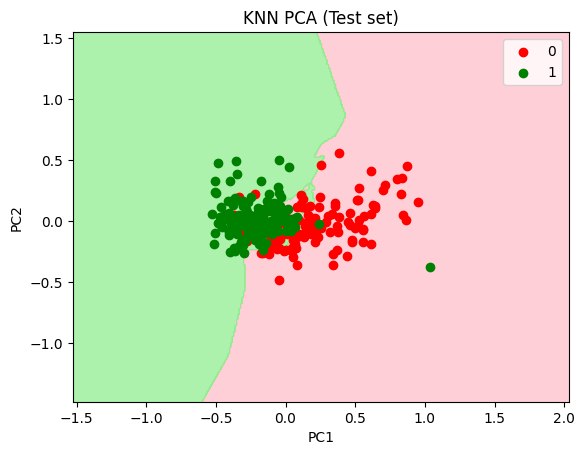

In [76]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test_new
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()